In [257]:
## PAGA TRAJECTORY

In [258]:
#!pip install git+https://github.com/dynverse/dynclipy.git

In [265]:
adata_bu = adata

In [426]:
import pandas as pd 
import anndata
import numpy as np
import dynclipy
import scanpy as sc
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
os.chdir("/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-integration/")

In [267]:
## - Set parameters of ti
parameters = {
    "n_comps": 50,
    "n_neighbors": 15,
    "n_dcs": 15,
    "embedding_type": "fa",
    "connectivity_cutoff": 0.05,
    "resolution": 1
             }

In [202]:
## -  Read data
counts = pd.read_csv('/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-integration/data/Int-EPs_normalizedData_batchCorrected-Seurat_PreAs-ASCs-IGFBP2-Meso-VSMPs_Singlets.csv', index_col = 0)
meta = pd.read_csv('/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-integration/data/Int-EPs_meta_PreA-ASCs-IGFBP2-Meso-VSMPs_Singlets.csv')

In [451]:
## -  Read data
# counts = pd.read_csv('/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-each-dataset/data/EP7_normalized_ASCs-PreAs-IGFBP2-Meso-VSMPs_Singlets.csv', index_col = 0)
meta = pd.read_csv('/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-each-dataset/data/EP7_meta_ASCs-PreAs-IGFBP2-Meso-VSMPs_Singlets.csv')

In [453]:
## - Create data
adata = anndata.AnnData(counts)
# sc.pp.normalize_total(adata)
# sc.pp.log1p(adata)
obs = pd.DataFrame(meta.copy())
#obs.columns = ["cell_id", "group_id", "batch_id"] for int
obs.columns = ["cell_id", "group_id"]

obs.index = obs["cell_id"]
obs["group_id"]=obs["group_id"].astype("category")

adata.obs = obs

/usr/local/lib/python3.9/site-packages/anndata/utils.py:141: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


In [490]:
## - Run PCA, neighbours and diff map
sc.tl.pca(adata, n_comps=100)
sc.pp.neighbors(adata, n_neighbors=parameters["n_neighbors"], use_rep="X_pca")
sc.tl.diffmap(adata, n_comps=parameters["n_dcs"])

In [495]:
## - Run clustering or specifying grouping
obs["louvain"] = obs["group_id"].astype("category")
# sc.tl.louvain(adata, resolution=parameters["resolution"])
# sc.tl.louvain(adata, resolution=1)

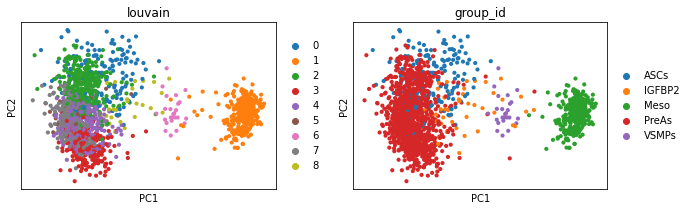

In [496]:
## - Visual of pca - not used 
sc.pl.pca(adata, color = ["louvain", "group_id"])

<Axes:>

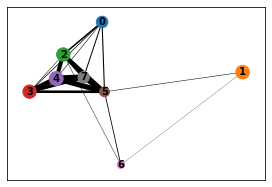

In [493]:
## - Run PAGA
sc.tl.paga(adata)
sc.pl.paga(adata, threshold=0.03, layout='fa', show=False) #Visualize

In [461]:
## - Draw graph
sc.tl.draw_graph(adata, color=['group_id'])
# sc.pl.draw_graph(adata, color=['group_id'])

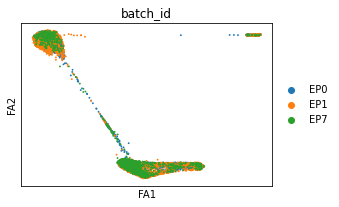

In [214]:
#sc.pl.draw_graph(adata, color=['batch_id'])

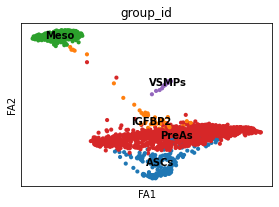

In [462]:
## - Recompute embedding with PAGA init 
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['group_id'], legend_loc = 'on data')

In [117]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4.5,3)

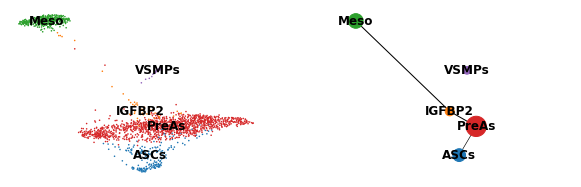

In [473]:
sc.pl.paga_compare(
    adata, threshold=0.167, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=False, save=False)

In [434]:
np.mean(adata.obsm["X_draw_graph_fa"][adata.obs["group_id"] == "ASCs",1])

-16927.6693945042

In [438]:
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return a.flat[idx]

-16929.26519623576

In [440]:
## - Pseudo time 
# start_id
n = np.where(adata.obsm["X_draw_graph_fa"][:8738,1] == find_nearest(adata.obsm["X_draw_graph_fa"][adata.obs["group_id"] == "ASCs",1], np.mean(adata.obsm["X_draw_graph_fa"][adata.obs["group_id"] == "ASCs",1])))
start_id = adata.obs["cell_id"][n[0][0]]
start_id

'EP0_CAAGTTGAGTGGTCCC-1'

In [441]:
# calculate
adata.uns['iroot'] = np.where(adata.obs.index == start_id)[0][0]
sc.tl.dpt(adata,n_dcs = min(adata.obsm['X_diffmap'].shape[1], 10))

In [447]:
# save
pd.DataFrame.to_csv(adata.obs["dpt_pseudotime"],
                    '/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-integration/pseudotime.csv')

In [195]:
genes = ['ENSG00000169908', 'ENSG00000243566', 'ENSG00000196154', 'ENSG00000102854',
         'ENSG00000167644', 'ENSG00000111057', 'ENSG00000170421', 'ENSG00000166482',
         'ENSG00000167757', 'ENSG00000211445', 'ENSG00000171345', 'ENSG00000135480',
         'ENSG00000148180', 'ENSG00000139329', 'ENSG00000189129', 'ENSG00000211892',
         'ENSG00000077942', 'ENSG00000148671', 'ENSG00000161905', 'ENSG00000276850']

In [238]:
g = ["ENSG00000143196", "ENSG00000101955", "ENSG00000189058" ,"ENSG00000112936", 
     "ENSG00000145824", "ENSG00000107562", "ENSG00000146674", "ENSG00000145423",
     "ENSG00000148180", "ENSG00000147257", "ENSG00000148926", "ENSG00000161544",
     "ENSG00000139329", "ENSG00000211445", "ENSG00000111341", "ENSG00000151790",
     "ENSG00000130208", "ENSG00000162552", "ENSG00000123496", "ENSG00000095713", 
     "ENSG00000164109", "ENSG00000137463", "ENSG00000175063", "ENSG00000130203",
     "ENSG00000169116", "ENSG00000164929", "ENSG00000141469", "ENSG00000115457",
     "ENSG00000108688", "ENSG00000197245", "ENSG00000169908", "ENSG00000243566",
     "ENSG00000196154", "ENSG00000102854", "ENSG00000167644", "ENSG00000111057", 
     "ENSG00000170421", "ENSG00000166482", "ENSG00000167757", "ENSG00000171345",
     "ENSG00000135480", "ENSG00000189129"]

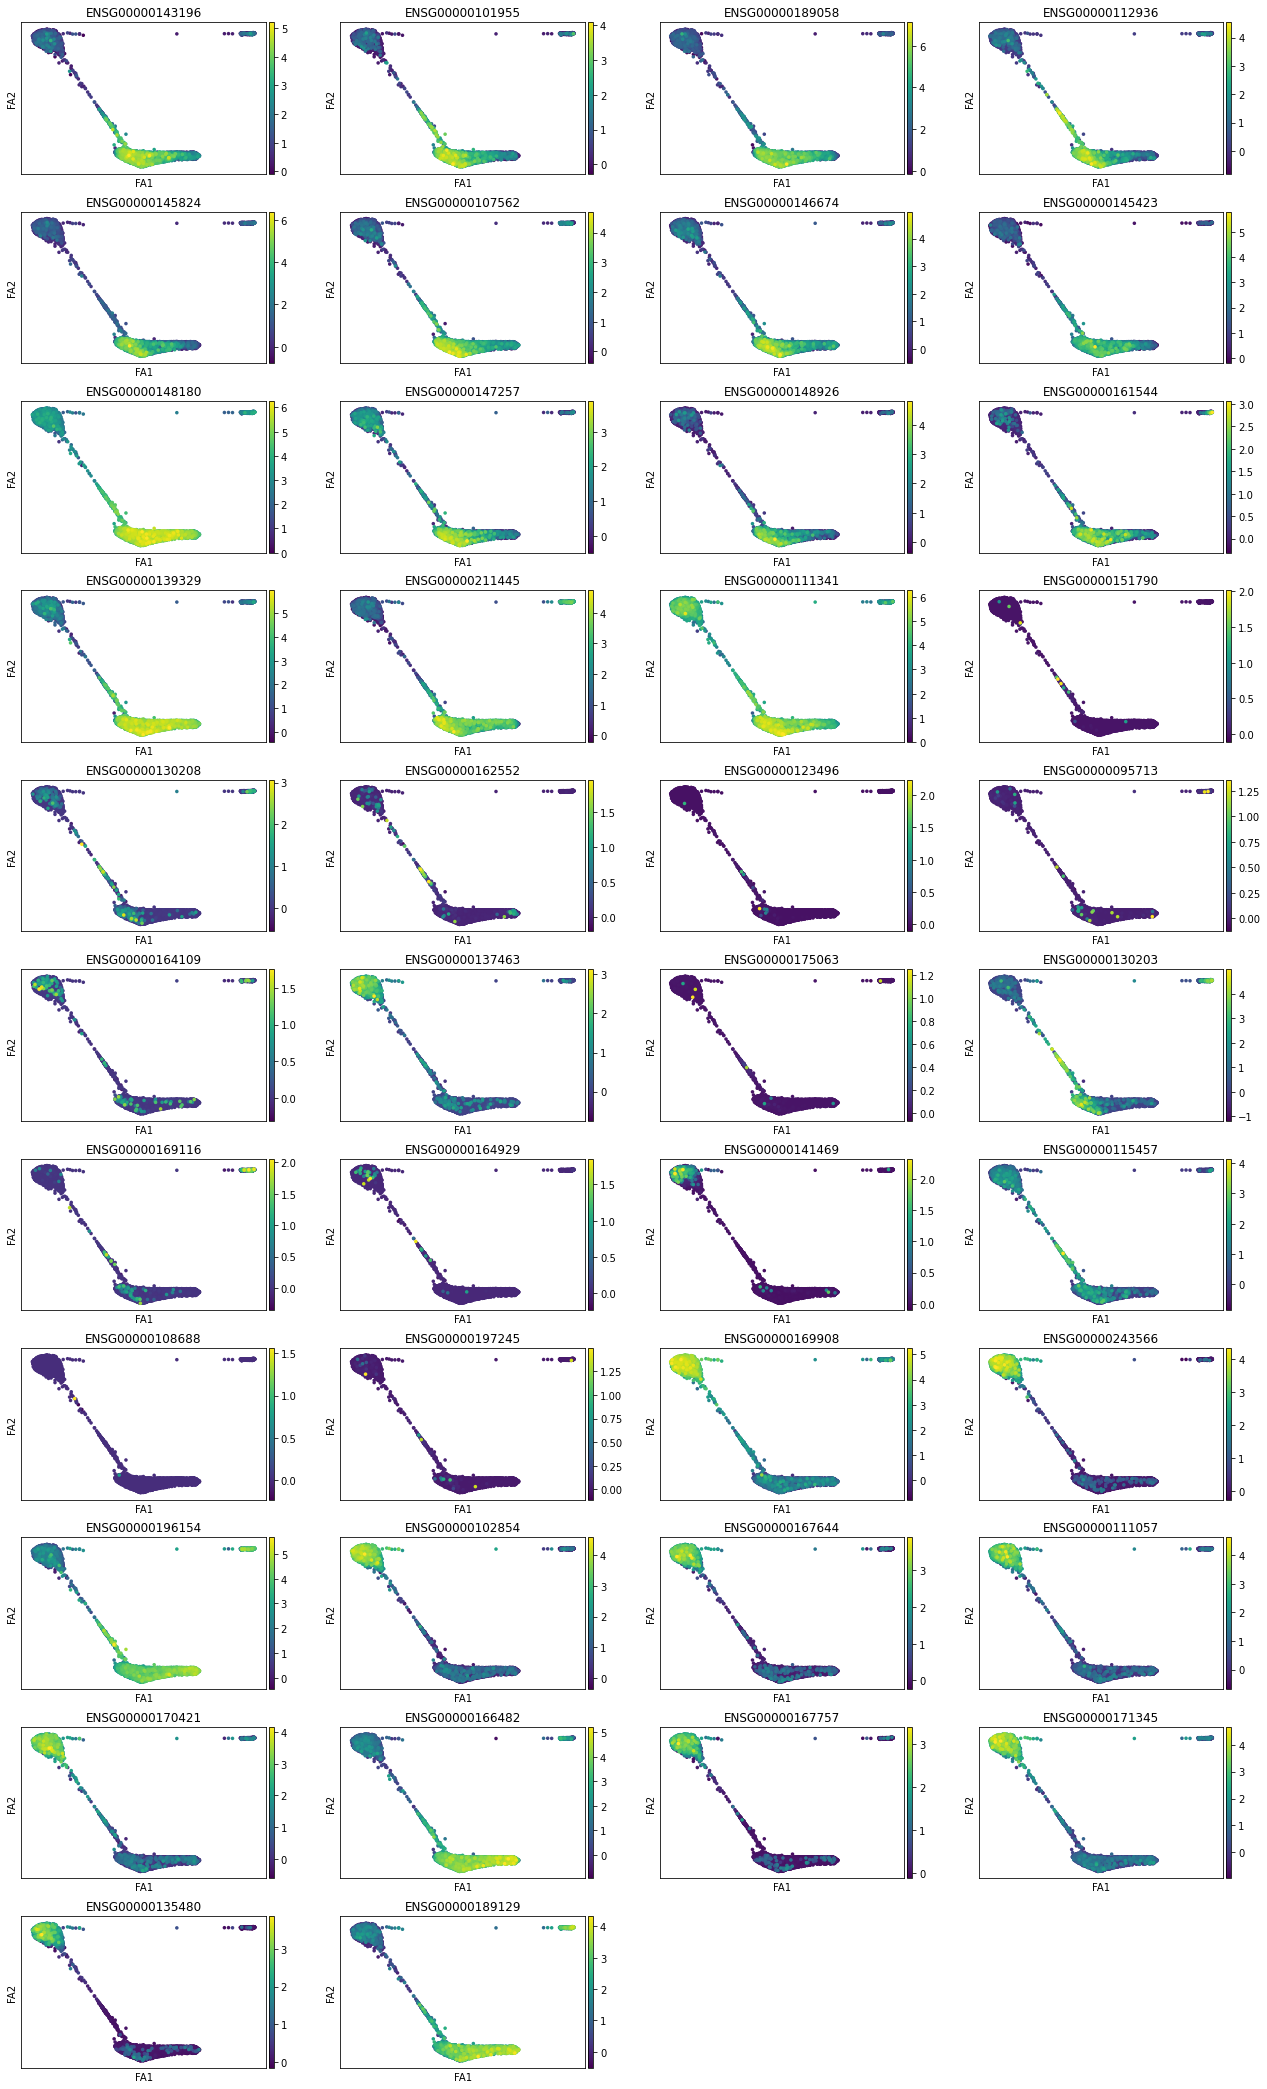

In [239]:
sc.pl.draw_graph(adata, size=50, 
                 color=g, 
                 legend_loc='on data')

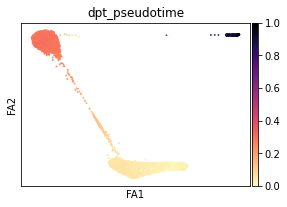

In [444]:
sc.pl.draw_graph(adata, color=['dpt_pseudotime'], legend_loc='on data', color_map="magma_r")

In [445]:
adata.obs["dpt_pseudotime"].sort_values().index

Index(['EP0_CAAGTTGAGTGGTCCC-1', 'EP1_ACTGAGTCAAATTGCC-1',
       'EP0_CTGAAACCACCCATTC-1', 'EP0_AAACCTGCACTTCTGC-1',
       'EP0_TCGTAGATCACTCCTG-1', 'EP0_ACGAGCCGTTTCGCTC-1',
       'EP0_GTGCGGTAGTTCGCGC-1', 'EP1_ACGGGCTGTTTAGCTG-1',
       'EP1_CAAGATCCAGAAGCAC-1', 'EP0_CCACGGATCAGCTGGC-1',
       ...
       'EP1_CTTACCGTCTGCTGCT-1', 'EP1_GCGAGAACACTAAGTC-1',
       'EP1_CCATGTCCATTTCACT-1', 'EP1_CGAGCCATCTTGTCAT-1',
       'EP1_AAAGATGGTTCCAACA-1', 'EP1_TAAACCGTCAGCTGGC-1',
       'EP7_TACTTACCATATTCGG-1', 'EP1_ACGCCGACATAACCTG-1',
       'EP1_CTCGTCAAGACACTAA-1', 'EP1_CTGATAGTCCCATTTA-1'],
      dtype='object', name='cell_id', length=8738)

In [384]:
ord = adata.obs.loc[adata.obs["dpt_pseudotime"].sort_values().index]

In [407]:
adata.obs["dpt_pseudotime"].sort_values().index

Index(['EP1_ATTATCCAGAGTCTGG-1', 'EP1_TTCCCAGAGGCCGAAT-1',
       'EP1_GGCAATTCACTTCGAA-1', 'EP0_TTGCGTCAGCAGGCTA-1',
       'EP1_TACGGATCATGCCACG-1', 'EP1_ACTTTCATCAGCTCGG-1',
       'EP1_ACTGCTCGTAGCTTGT-1', 'EP1_TGACAACCAGCCACCA-1',
       'EP1_AAAGTAGAGCGGATCA-1', 'EP0_GGGAGATAGCTACCTA-1',
       ...
       'EP1_CTTACCGTCTGCTGCT-1', 'EP1_GCGAGAACACTAAGTC-1',
       'EP1_CCATGTCCATTTCACT-1', 'EP1_CGAGCCATCTTGTCAT-1',
       'EP1_AAAGATGGTTCCAACA-1', 'EP1_TAAACCGTCAGCTGGC-1',
       'EP7_TACTTACCATATTCGG-1', 'EP1_ACGCCGACATAACCTG-1',
       'EP1_CTCGTCAAGACACTAA-1', 'EP1_CTGATAGTCCCATTTA-1'],
      dtype='object', name='cell_id', length=8738)

In [414]:
adata[adata.obs["dpt_pseudotime"].sort_values().index,g].X

ArrayView([[3.595699, 2.978242, 5.561758, ..., 0.      , 0.      ,
            2.978242],
           [4.097899, 1.746952, 3.459186, ..., 0.      , 0.      ,
            1.746952],
           [3.112933, 1.667212, 5.075193, ..., 0.      , 0.      ,
            3.112933],
           ...,
           [1.944198, 1.944198, 1.384796, ..., 0.      , 0.      ,
            2.300787],
           [2.241819, 0.      , 0.      , ..., 0.      , 0.      ,
            0.      ],
           [1.538223, 0.      , 1.538223, ..., 0.      , 0.      ,
            2.482313]], dtype=float32)

/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/paga.py:1229: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/paga.py:1276: UserWarning: FixedFormatter should only be used together with FixedLocator
  anno_axis.set_yticklabels(['', anno, ''], fontsize=ytick_fontsize)


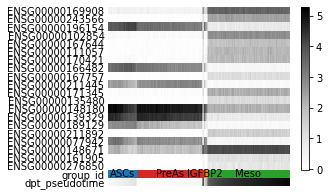

In [428]:
sc.pl.paga_path(
        adata, color_map= 'Greys',
    nodes = ['ASCs','PreAs', 'IGFBP2', 'Meso'], n_avg=50,
    keys = ["ENSG00000169908",
"ENSG00000243566",
"ENSG00000196154",
"ENSG00000102854",
"ENSG00000167644",
"ENSG00000111057",
"ENSG00000170421",
"ENSG00000166482",
"ENSG00000167757",
"ENSG00000211445",
"ENSG00000171345",
"ENSG00000135480",
"ENSG00000148180",
"ENSG00000139329",
"ENSG00000189129",
"ENSG00000211892",
"ENSG00000077942",
"ENSG00000148671",
"ENSG00000161905",
"ENSG00000276850"], as_heatmap= True,
    groups_key='group_id', save = '.svg', 
   )

In [50]:
dimred_name = "X_draw_graph_" + "fa"

In [421]:
adata.obs["louvain"].values

['ASCs', 'ASCs', 'ASCs', 'ASCs', 'ASCs', ..., 'PreAs', 'PreAs', 'PreAs', 'PreAs', 'PreAs']
Length: 8738
Categories (5, object): ['ASCs', 'IGFBP2', 'Meso', 'PreAs', 'VSMPs']

In [431]:
pd.DataFrame.to_csv(adata.obs["dpt_pseudotime"], "/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-integration/Dpt_pseudotime.csv")

In [ ]:
sns.heatmap(np.transpose(adata[adata.obs["dpt_pseudotime"].sort_values().index,g].X),
           xticklabels=adata.obs["louvain"].values, yticklabels=g)
plt.savefig('/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-integration/figures/heatmap.pdf')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [327]:
%reset_selective dataset


Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [295]:
# milestone network
milestone_network = pd.DataFrame(
  np.triu(adata.uns["paga"]["connectivities"].todense(), k = 0),
  index=adata.obs.louvain.cat.categories,
  columns=adata.obs.louvain.cat.categories
).stack().reset_index()
milestone_network.columns = ["from", "to", "length"]
milestone_network = milestone_network.query("length >= " + str(parameters["connectivity_cutoff"])).reset_index(drop=True)
milestone_network["directed"] = False

In [296]:
# dimred
dimred = pd.DataFrame([x for x in adata.obsm["X_draw_graph_" + "fa"].T]).T
dimred.columns = ["comp_" + str(i+1) for i in range(dimred.shape[1])]
dimred["cell_id"] = adata.obs.index

In [313]:
adata.obs

,cell_id,group_id,batch_id,louvain,dpt_pseudotime,percentage,branch_id
cell_id,,,,,,,
EP0_AAACCTGAGCTGTCTA-1,EP0_AAACCTGAGCTGTCTA-1,ASCs,EP0,ASCs,0.029976,0.124941,ASCs
EP0_AAACCTGCACTTCTGC-1,EP0_AAACCTGCACTTCTGC-1,ASCs,EP0,ASCs,0.043185,0.179998,ASCs
EP0_AAACCTGCAGCGTAAG-1,EP0_AAACCTGCAGCGTAAG-1,ASCs,EP0,ASCs,0.034338,0.143124,ASCs
EP0_AAACCTGTCCAAGTAC-1,EP0_AAACCTGTCCAAGTAC-1,ASCs,EP0,ASCs,0.041266,0.172001,ASCs
EP0_AAACCTGTCCTCAATT-1,EP0_AAACCTGTCCTCAATT-1,ASCs,EP0,ASCs,0.024442,0.101878,ASCs
...,...,...,...,...,...,...,...
EP7_TCATATCGTCTACGAT-1,EP7_TCATATCGTCTACGAT-1,PreAs,EP7,PreAs,0.012896,0.042404,PreAs
EP7_GAGGGATCAGTGACCC-1,EP7_GAGGGATCAGTGACCC-1,PreAs,EP7,PreAs,0.015743,0.052354,PreAs
EP7_AGAACCTAGGCATCGA-1,EP7_AGAACCTAGGCATCGA-1,PreAs,EP7,PreAs,0.020556,0.069174,PreAs


In [297]:
# branch progressions: the scaled dpt_pseudotime within every cluster
branch_progressions = adata.obs
branch_progressions["dpt_pseudotime"] = branch_progressions["dpt_pseudotime"].replace([np.inf, -np.inf], 1) # replace unreachable pseudotime with maximal pseudotime
branch_progressions["percentage"] = branch_progressions.groupby("louvain")["dpt_pseudotime"].apply(lambda x: (x-x.min())/(x.max() - x.min())).fillna(0.5)
branch_progressions["cell_id"] = adata.obs.index
branch_progressions["branch_id"] = branch_progressions["louvain"].astype(np.str)
branch_progressions = branch_progressions[["cell_id", "branch_id", "percentage"]]

<ipython-input-297-8ec895f8627f>:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  branch_progressions["branch_id"] = branch_progressions["louvain"].astype(np.str)


In [352]:
# branches:
# - length = difference between max and min dpt_pseudotime within every cluster
# - directed = not yet correctly inferred
branches = adata.obs.groupby("louvain").apply(lambda x: x["dpt_pseudotime"].max() - x["dpt_pseudotime"].min()).reset_index()
branches.columns = ["branch_id", "length"]
branches["branch_id"] = branches["branch_id"].astype(np.str)
branches["directed"] = True

<ipython-input-352-b2704c842d1b>:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  branches["branch_id"] = branches["branch_id"].astype(np.str)


In [341]:
# branch network: determine order of from and to based on difference in average pseudotime
branch_network = milestone_network[["from", "to"]]
average_pseudotime = adata.obs.groupby("louvain")["dpt_pseudotime"].mean()
for i, (branch_from, branch_to) in enumerate(zip(branch_network["from"], branch_network["to"])):
  if average_pseudotime[branch_from] > average_pseudotime[branch_to]:
    branch_network.at[i, "to"] = branch_from
    branch_network.at[i, "from"] = branch_to

In [342]:
branch_network

,from,to
0,PreAs,ASCs
1,IGFBP2,Meso
2,PreAs,IGFBP2


In [359]:
branches

,branch_id,length,directed
0,ASCs,0.239918,True
1,IGFBP2,0.203327,True
2,Meso,0.274841,True
3,PreAs,0.286132,True
4,VSMPs,0.979968,True


In [360]:
branches.index = branches.branch_id

In [361]:
dataset = dynclipy.wrap_data(cell_ids = adata.obs.index)


In [351]:
branch_network

,from,to
0,PreAs,ASCs
1,IGFBP2,Meso
2,PreAs,IGFBP2


In [362]:
dataset.add_branch_trajectory(
  grouping = grouping,
  branch_progressions = branch_progressions,
  branches = branches,
  branch_network = branch_network
)

In [363]:
dataset.add_dimred(dimred = dimred)
#dataset.add_timings(checkpoints)

In [364]:
branch_network

,from,to
0,PreAs,ASCs
1,IGFBP2,Meso
2,PreAs,IGFBP2


In [370]:
pd.DataFrame.to_csv(branch_network,'/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-integration/branch_network.txt' )
pd.DataFrame.to_csv(branches,'/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-integration/branches.txt' )
pd.DataFrame.to_csv(branch_progressions,'/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-integration/branch_progression.txt' )





In [365]:
dynclipy.ro.r(
    f"""saveRDS(
        {dataset.id},
        '/home/pyrainer/SVRAW1/prainer/hASPCs/PAPER/10X_scRNA-seq/8.Trajectory_inference/On-integration/int-EPs_PreAs-ASCs-Meso-VSMPs_Singlets_PAGA-model2.rds'
    )
""")

<rpy2.rinterface_lib.sexp.NULLType object at 0x14ef94064340> [RTYPES.NILSXP]

In [324]:
dataset_test.id

'DWAZSDQKQRGSFYFIYZZJ'

In [336]:
dataset.id

'RCVHZHABRPJFAPSKVSRO'

In [323]:
dataset_test = dataset